In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.stats.weightstats import ttest_ind

from dtmrpy import DT_GMM

df = pd.read_pickle("data_files/dtmri_dataframe_11_2.pkl")
df = df[df['labels']!='#NULL!']


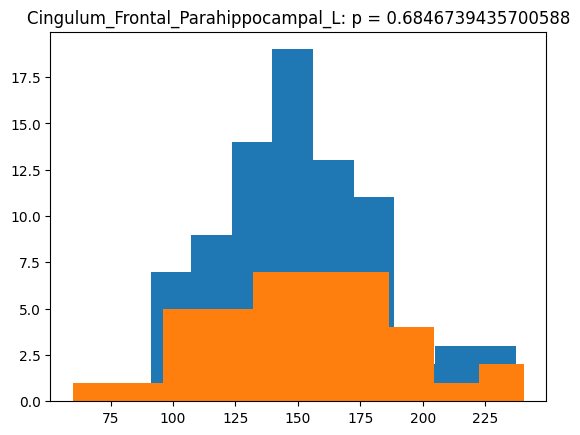

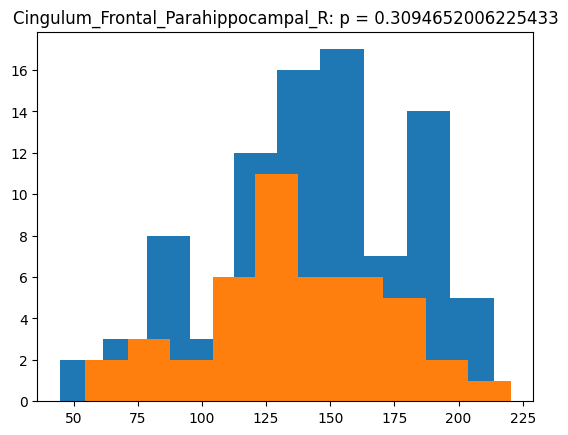

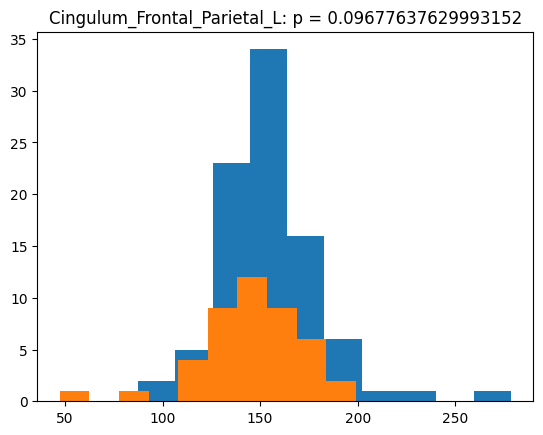

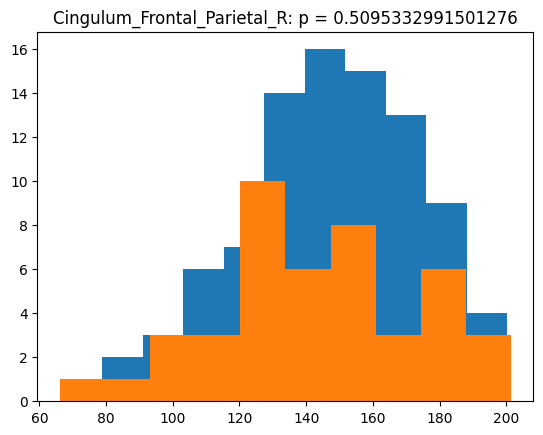

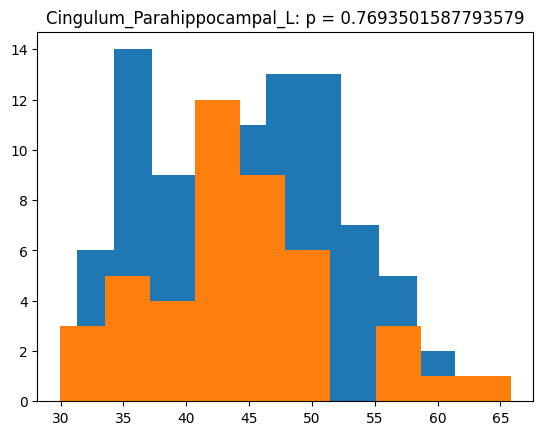

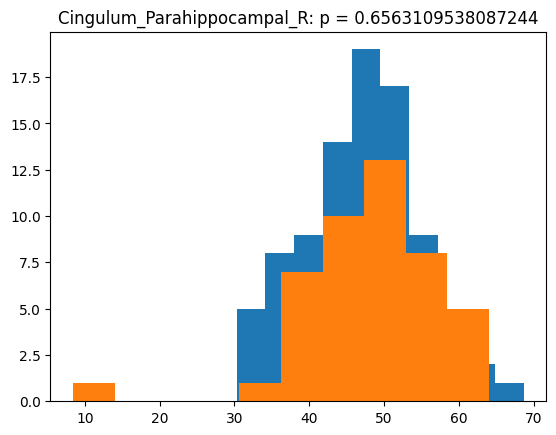

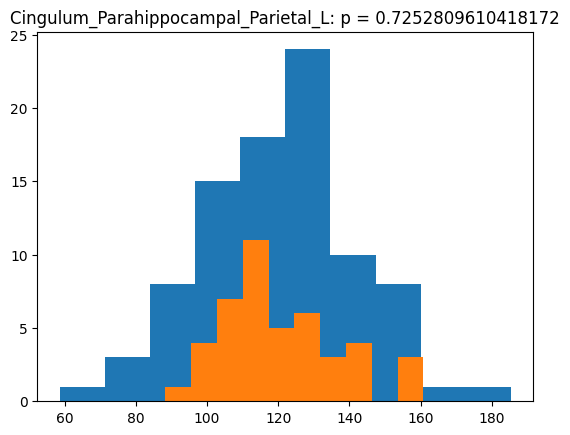

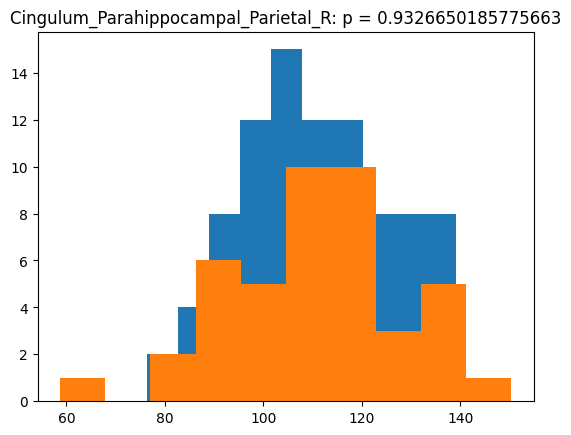

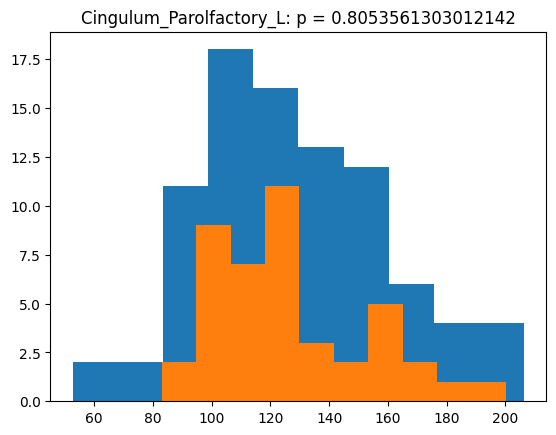

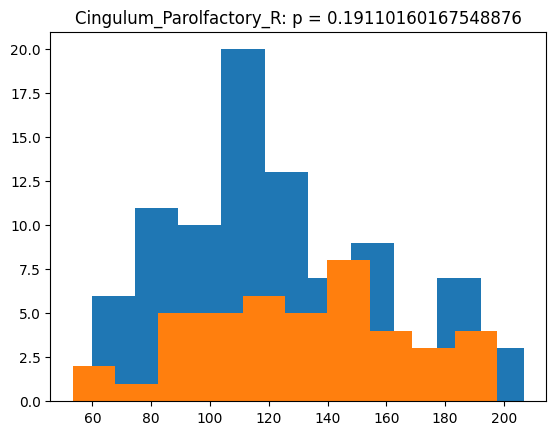

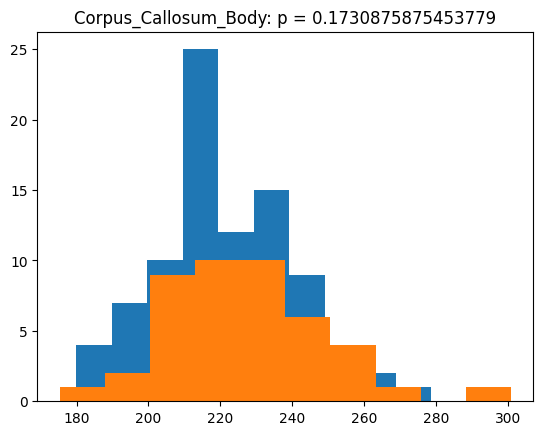

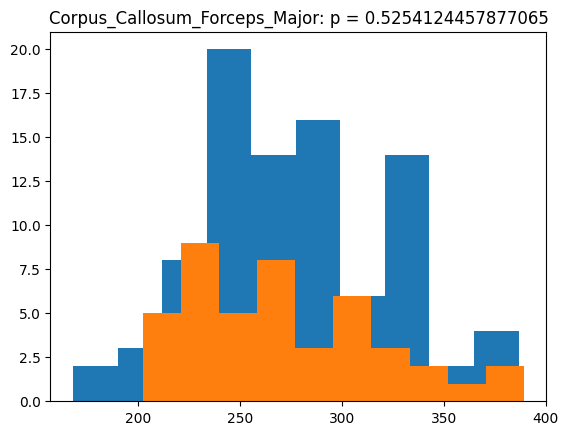

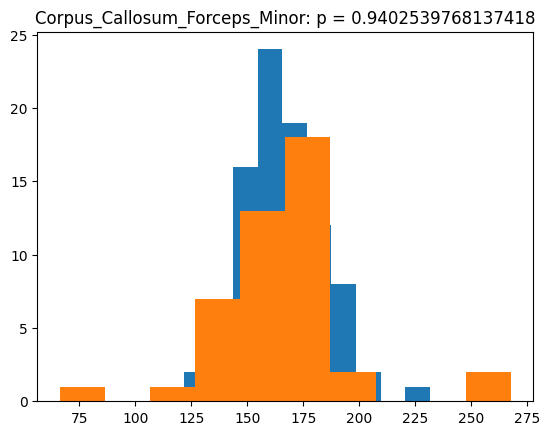

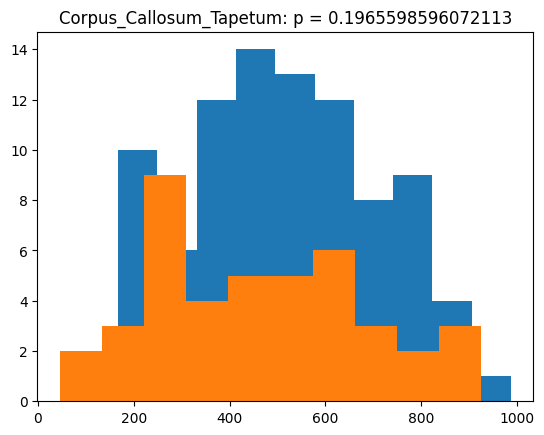

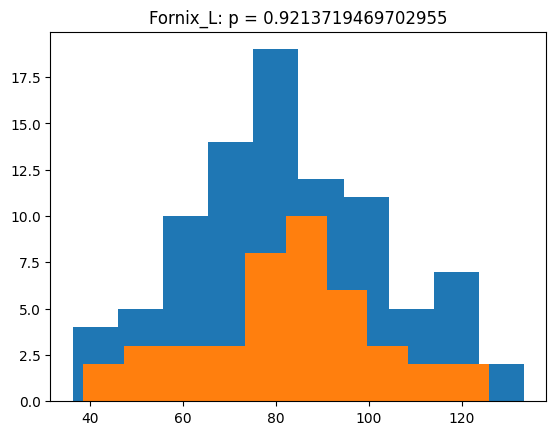

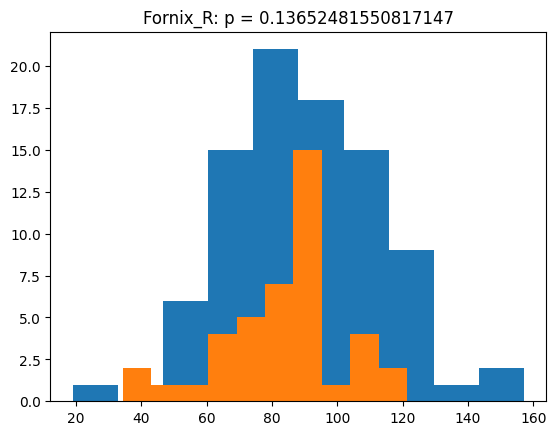

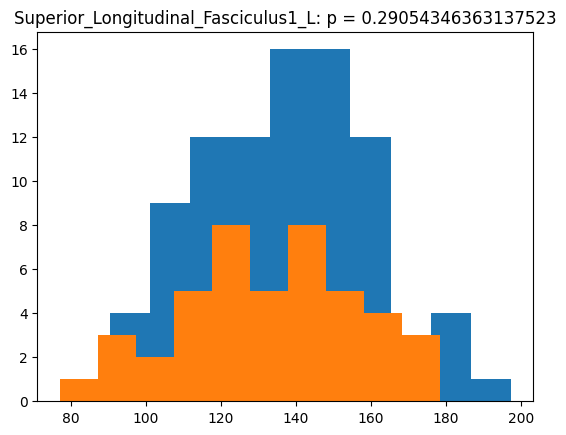

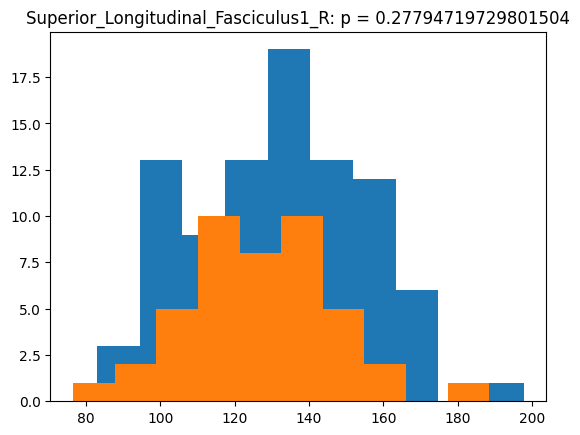

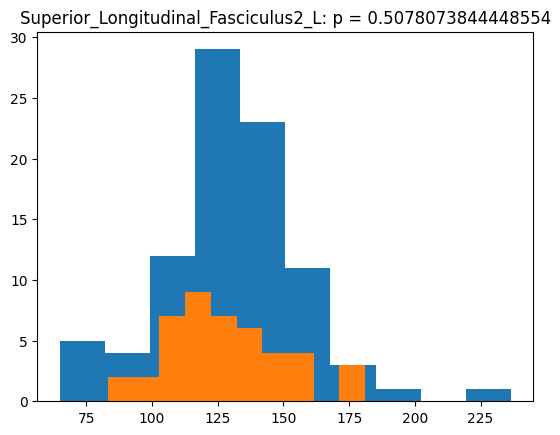

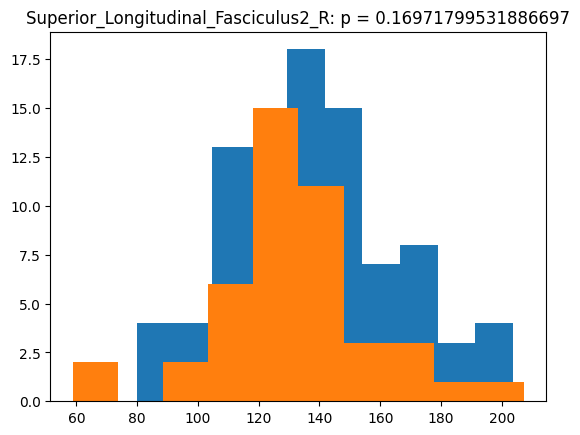

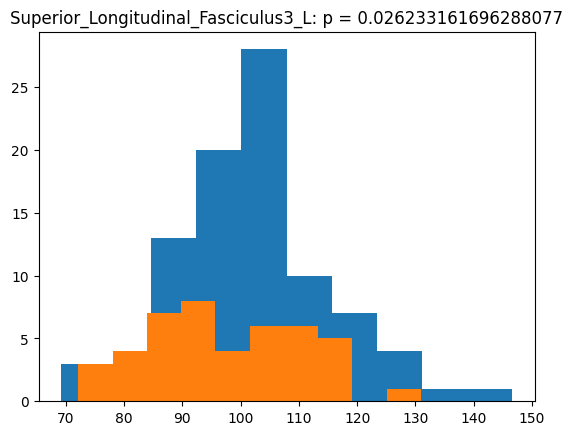

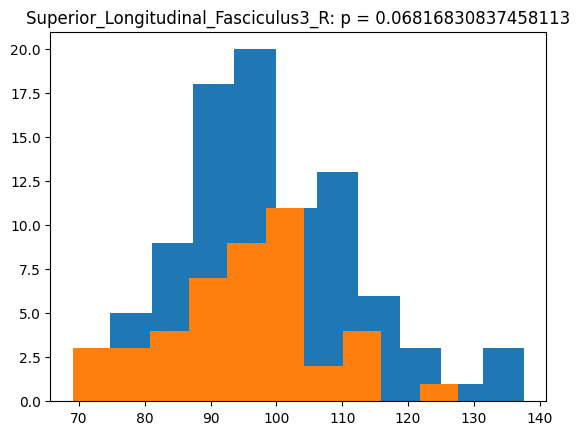

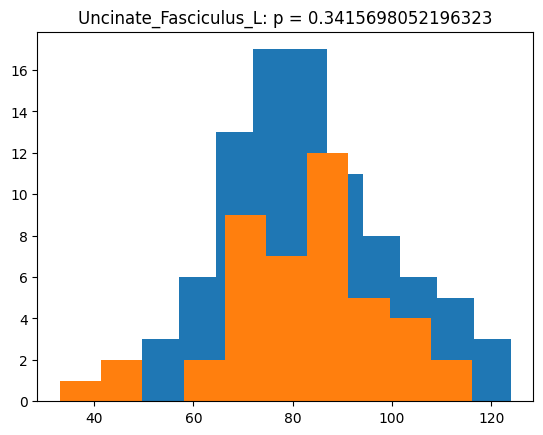

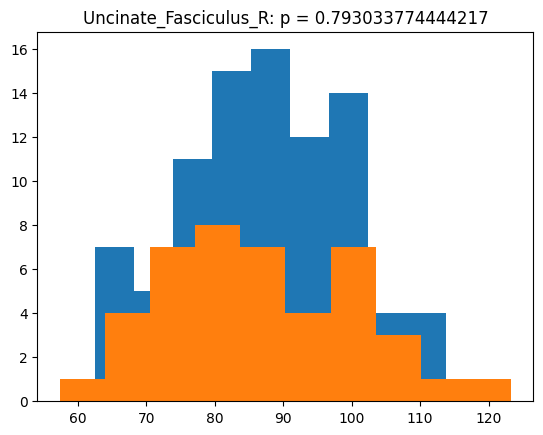

In [4]:
p_list=[]

for tract in df.columns[1:-1]:
    tract_name=tract
    y = df['labels'][df[tract].notna()].values.astype(int)
    tract = df[tract].dropna()
    X = np.array([np.mean(mu.weights_) for mu in tract])
    
    plt.hist(X[y==0])
    plt.hist(X[y==1])
    p_list.append(ttest_ind(X[y==0],X[y==1])[1])
    plt.title( tract_name+": p = "+str(p_list[-1]))

    plt.show()

In [5]:
from statsmodels.stats.multitest import fdrcorrection
fdrcorrection(np.sort(p_list))

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False]),
 array([0.58967958, 0.58967958, 0.58967958, 0.58967958, 0.58967958,
        0.58967958, 0.58967958, 0.58967958, 0.6751968 , 0.6751968 ,
        0.6751968 , 0.68313961, 0.84065991, 0.84065991, 0.84065991,
        0.92040701, 0.92040701, 0.92040701, 0.92040701, 0.92040701,
        0.92040701, 0.94025398, 0.94025398, 0.94025398]))